# Final EDA and Project Analysis: Airbnb Dataset
***
*Hannah Still for Group 7*


**This notebook must run in cell order**

# Import statements

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import random
import re
from scipy import stats
import matplotlib.cm as cm

# Set up dataframes
checking on included variables and values

In [2]:
abnb_df = pd.read_csv('data/csv/airbnb_datasets/airbnbfiles_final_cleansed/cleansed_detailed_listings_FINAL.csv')

# inspect head and tail
abnb_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
0,714569379355913481,2023-03-14,39009854,2015-07-20,"London, United Kingdom",1.0,Haringey,51.597280,-0.139330,Private room in condo,...,1 shared bath,1.0,1.0,$100.00,0,NaN,1,365,t,1
1,808038970516277767,2023-03-14,495977998,2023-01-14,"London, United Kingdom",31.0,Barnet,51.636518,-0.177475,Entire rental unit,...,1 bath,1.0,1.0,$65.00,0,NaN,180,365,t,7
2,822557738577472503,2023-03-14,325629338,2020-01-08,NaN,8.0,Harrow,51.608180,-0.277400,Entire rental unit,...,2 baths,2.0,2.0,$132.00,0,NaN,2,28,t,4
3,3518856,2023-03-14,187811,2010-08-01,"London, United Kingdom",5.0,Merton,51.422310,-0.188410,Private room in rental unit,...,1 private bath,1.0,1.0,$100.00,4,3.67,5,1125,t,2
4,4876550,2023-03-14,25087384,2014-12-22,NaN,1.0,Barnet,51.602282,-0.193606,Entire condo,...,1 bath,1.0,1.0,$120.00,0,NaN,5,90,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141388,39286243,2022-06-08,301433244,2019-10-10,GB,0.0,Greenwich,51.497380,0.014140,Entire rental unit,...,2 baths,1.0,1.0,$151.00,5,4.60,2,365,t,1
141389,54279511,2022-06-08,124614495,2017-04-06,"Amsterdam, North Holland, Netherlands",0.0,Newham,51.512800,0.007800,Entire condo,...,2 baths,2.0,2.0,$105.00,1,5.00,7,112,t,1
141390,26365828,2022-06-08,14517363,2014-04-20,"Greater London, England, United Kingdom",8.0,Greenwich,51.481940,-0.016180,Entire rental unit,...,2 baths,2.0,3.0,$221.00,45,4.76,7,1125,t,7
141391,38661117,2022-06-08,1409439,2011-11-15,"London, England, United Kingdom",31.0,Greenwich,51.497750,0.013650,Entire condo,...,2 baths,3.0,6.0,$200.00,28,4.68,3,33,t,30


In [3]:
# confirming column names included in cleansed dataset

abnb_df.columns

Index(['id', 'last_scraped', 'host_id', 'host_since', 'host_location',
       'host_total_listings_count', 'borough', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating', 'minimum_nights', 'maximum_nights',
       'has_availability', 'calculated_host_listings_count'],
      dtype='object')

# Filter dataset to target dates 11th December 2022 - 14th March 2023
reinspecting variables and values

In [4]:
# filter dataset to dates 11th December 2022 - 14th March 2023
# removes 114,669 rows
# working with 26724 rows × 22 columns

# Convert last scraped column to datetime
abnb_df['last_scraped'] = pd.to_datetime(abnb_df['last_scraped'])

# Set start and end dates 
start_date = pd.to_datetime('2022-12-11')
end_date = pd.to_datetime('2023-03-14')

# Filter the dataframe to include only rows that meet the above
abnb_filtered_df = abnb_df[(abnb_df['last_scraped'] >= start_date) & (abnb_df['last_scraped'] <= end_date)]


abnb_filtered_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
0,714569379355913481,2023-03-14,39009854,2015-07-20,"London, United Kingdom",1.0,Haringey,51.597280,-0.139330,Private room in condo,...,1 shared bath,1.0,1.0,$100.00,0,NaN,1,365,t,1
1,808038970516277767,2023-03-14,495977998,2023-01-14,"London, United Kingdom",31.0,Barnet,51.636518,-0.177475,Entire rental unit,...,1 bath,1.0,1.0,$65.00,0,NaN,180,365,t,7
2,822557738577472503,2023-03-14,325629338,2020-01-08,NaN,8.0,Harrow,51.608180,-0.277400,Entire rental unit,...,2 baths,2.0,2.0,$132.00,0,NaN,2,28,t,4
3,3518856,2023-03-14,187811,2010-08-01,"London, United Kingdom",5.0,Merton,51.422310,-0.188410,Private room in rental unit,...,1 private bath,1.0,1.0,$100.00,4,3.67,5,1125,t,2
4,4876550,2023-03-14,25087384,2014-12-22,NaN,1.0,Barnet,51.602282,-0.193606,Entire condo,...,1 bath,1.0,1.0,$120.00,0,NaN,5,90,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75233,18762362,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.549400,-0.226210,Entire condo,...,1 bath,1.0,1.0,$65.00,10,3.80,2,500,t,76
75235,3191081,2023-03-14,16175110,2014-05-30,"London, United Kingdom",1.0,Lambeth,51.469360,-0.126080,Entire rental unit,...,1.5 baths,1.0,2.0,$116.00,19,4.84,3,30,t,1
75236,654949753111689538,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.551480,-0.223710,Entire rental unit,...,1 bath,NaN,1.0,$69.00,23,4.52,2,365,t,76
75237,827653589245352551,2023-03-14,500054646,2023-02-07,NaN,1.0,Islington,51.543923,-0.088931,Entire rental unit,...,2 baths,1.0,1.0,$140.00,2,5.00,1,365,t,1


In [5]:
# Find NaN count all columns

nan_counts = abnb_filtered_df.isnull().sum(axis=0)

nan_counts

id                                   0
last_scraped                         0
host_id                              0
host_since                           1
host_location                     6707
host_total_listings_count            1
borough                              0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      44
bedrooms                          1085
beds                               399
price                                0
number_of_reviews                    0
review_scores_rating              6283
minimum_nights                       0
maximum_nights                       0
has_availability                     0
calculated_host_listings_count       0
dtype: int64

In [6]:
# count instances of borough in the filtered dataset

borough_count = abnb_filtered_df['borough'].value_counts()

borough_count

borough
Westminster               2583
Kensington and Chelsea    1979
Lambeth                   1893
Wandsworth                1830
Camden                    1583
Hammersmith and Fulham    1544
Brent                     1432
Islington                 1299
Barnet                    1233
Ealing                    1006
Southwark                  981
Haringey                   775
Croydon                    743
Merton                     733
Greenwich                  730
Hounslow                   591
Richmond upon Thames       583
Enfield                    510
Lewisham                   494
Hillingdon                 492
Newham                     487
Redbridge                  475
Bromley                    383
Kingston upon Thames       349
Bexley                     340
Barking and Dagenham       322
Waltham Forest             282
Havering                   276
Harrow                     272
Sutton                     215
Hackney                    181
City of London             122


In [7]:
# Inspect random 30 rows and selected columns for target analysis from the DF
random_rows = abnb_filtered_df[['host_id', 'host_location', 'host_total_listings_count', 'borough', 'room_type', 'price', 'number_of_reviews','review_scores_rating', 'calculated_host_listings_count']].sample(n=30, random_state=random.seed())

random_rows

,host_id,host_location,host_total_listings_count,borough,room_type,price,number_of_reviews,review_scores_rating,calculated_host_listings_count
26005,60151108,"London, United Kingdom",32.0,Newham,Entire home/apt,$161.00,1,5.00,10
64848,78624828,"London, United Kingdom",2.0,Westminster,Entire home/apt,"$2,500.00",23,4.83,2
29969,59332669,NaN,4.0,Richmond upon Thames,Private room,$100.00,49,4.90,4
41052,90831525,"London, United Kingdom",1.0,Enfield,Private room,$85.00,16,4.94,1
25164,49112888,"London, United Kingdom",1.0,Camden,Entire home/apt,$250.00,13,4.69,1
55581,483416358,NaN,2.0,Camden,Entire home/apt,$150.00,6,5.00,2
42923,478649998,"London, United Kingdom",1.0,Barnet,Entire home/apt,$100.00,43,4.79,1
3103,265731342,"England, United Kingdom",1.0,Barnet,Private room,$50.00,7,5.00,1
30961,438178209,NaN,30.0,Westminster,Entire home/apt,"$1,500.00",0,NaN,22
65420,485524049,NaN,2.0,Kensington and Chelsea,Private room,$57.00,8,4.38,1


# Filter dataset to remove shared rooms and hotel rooms
Hotel rooms and shared rooms not a useful measure for this analysis as the focus is on property that mights otherwise be available for rent on the open market: private rooms in shared properties as well as entire properties.

In [8]:
# Count the number of unique variables in room type
num_unique_room_types = abnb_filtered_df['room_type'].nunique()

# List the unique variables in room type
unique_room_types = abnb_filtered_df['room_type'].unique()

# Print the number of unique variables and the list of unique room types
print(f"The number of unique room types is: {num_unique_room_types}")
print(f"The unique room types in this dataset are: {unique_room_types}")

The number of unique room types is: 4
The unique room types in this dataset are: ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [9]:
# Drops 38 rows, row count is now 26476
# Drop rows with 'Shared room' and 'Hotel room' values in the room type column
abnb_propfil_df = abnb_filtered_df[~abnb_filtered_df['room_type'].isin(['Shared room', 'Hotel room'])]

abnb_propfil_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
0,714569379355913481,2023-03-14,39009854,2015-07-20,"London, United Kingdom",1.0,Haringey,51.597280,-0.139330,Private room in condo,...,1 shared bath,1.0,1.0,$100.00,0,NaN,1,365,t,1
1,808038970516277767,2023-03-14,495977998,2023-01-14,"London, United Kingdom",31.0,Barnet,51.636518,-0.177475,Entire rental unit,...,1 bath,1.0,1.0,$65.00,0,NaN,180,365,t,7
2,822557738577472503,2023-03-14,325629338,2020-01-08,NaN,8.0,Harrow,51.608180,-0.277400,Entire rental unit,...,2 baths,2.0,2.0,$132.00,0,NaN,2,28,t,4
3,3518856,2023-03-14,187811,2010-08-01,"London, United Kingdom",5.0,Merton,51.422310,-0.188410,Private room in rental unit,...,1 private bath,1.0,1.0,$100.00,4,3.67,5,1125,t,2
4,4876550,2023-03-14,25087384,2014-12-22,NaN,1.0,Barnet,51.602282,-0.193606,Entire condo,...,1 bath,1.0,1.0,$120.00,0,NaN,5,90,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75233,18762362,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.549400,-0.226210,Entire condo,...,1 bath,1.0,1.0,$65.00,10,3.80,2,500,t,76
75235,3191081,2023-03-14,16175110,2014-05-30,"London, United Kingdom",1.0,Lambeth,51.469360,-0.126080,Entire rental unit,...,1.5 baths,1.0,2.0,$116.00,19,4.84,3,30,t,1
75236,654949753111689538,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.551480,-0.223710,Entire rental unit,...,1 bath,NaN,1.0,$69.00,23,4.52,2,365,t,76
75237,827653589245352551,2023-03-14,500054646,2023-02-07,NaN,1.0,Islington,51.543923,-0.088931,Entire rental unit,...,2 baths,1.0,1.0,$140.00,2,5.00,1,365,t,1


In [10]:
# Check in on the number of room types
# Count the number of unique variables in room type
final_num_unique_room_types = abnb_propfil_df['room_type'].nunique()

# List the unique variables in room type
final_unique_room_types = abnb_propfil_df['room_type'].unique()

# Print the number of unique variables and the list of unique room types
print(f"The number of unique room types is: {final_num_unique_room_types}")
print(f"The unique room types in this dataset are: {final_unique_room_types}")

The number of unique room types is: 2
The unique room types in this dataset are: ['Private room' 'Entire home/apt']


# Overview of host location
Are hosts in London UK? Elsewhere in the UK? Overseas? Unknown location?

In [11]:
# Count hosts in London
hosts_in_london = len(abnb_propfil_df[abnb_propfil_df['host_location'].str.contains('London', na=False)])

# Count hosts outside London but in the United Kingdom
hosts_outside_london_uk = len(abnb_propfil_df[(~abnb_propfil_df['host_location'].str.contains('London', na=False)) & (abnb_propfil_df['host_location'].str.contains('United Kingdom', na=False))])

# Count hosts outside the United Kingdom
hosts_outside_uk = len(abnb_propfil_df[~abnb_propfil_df['host_location'].str.contains('United Kingdom', na=False)])

# Count unknown (NaN) values
unknown_hosts = abnb_propfil_df['host_location'].isnull().sum()

# Calculate total hosts outside London
total_hosts_outside_london = hosts_outside_london_uk + hosts_outside_uk

# Print the results
print(f"Number of hosts in London: {hosts_in_london}")
print(f"Number of hosts outside London, but in the United Kingdom: {hosts_outside_london_uk}")
print(f"Number of hosts outside the United Kingdom: {hosts_outside_uk}")
print(f"Number of hosts with an unknown location: {unknown_hosts}")
print(f"Total number of hosts outside London: {total_hosts_outside_london}")

Number of hosts in London: 13869
Number of hosts outside London, but in the United Kingdom: 5397
Number of hosts outside the United Kingdom: 7226
Number of hosts with an unknown location: 6632
Total number of hosts outside London: 12623


Text(0.5, 1.0, 'London Host Locations')

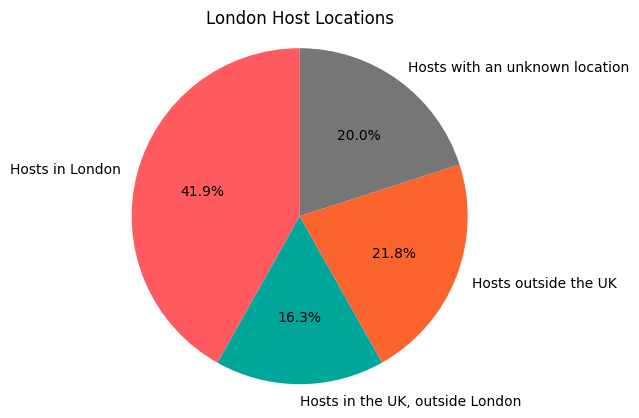

In [12]:
# Data for the pie chart
labels = ['Hosts in London', 'Hosts in the UK, outside London', 'Hosts outside the UK', 'Hosts with an unknown location']
sizes = [hosts_in_london, hosts_outside_london_uk, hosts_outside_uk, unknown_hosts]
colors = ['#FF5A5F', '#00A699', '#FC642D', '#767676']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


plt.title('London Host Locations')

# Investigating property type distribution by borough
And some EDA to help sort the property types

# Documenting a visualisation problem

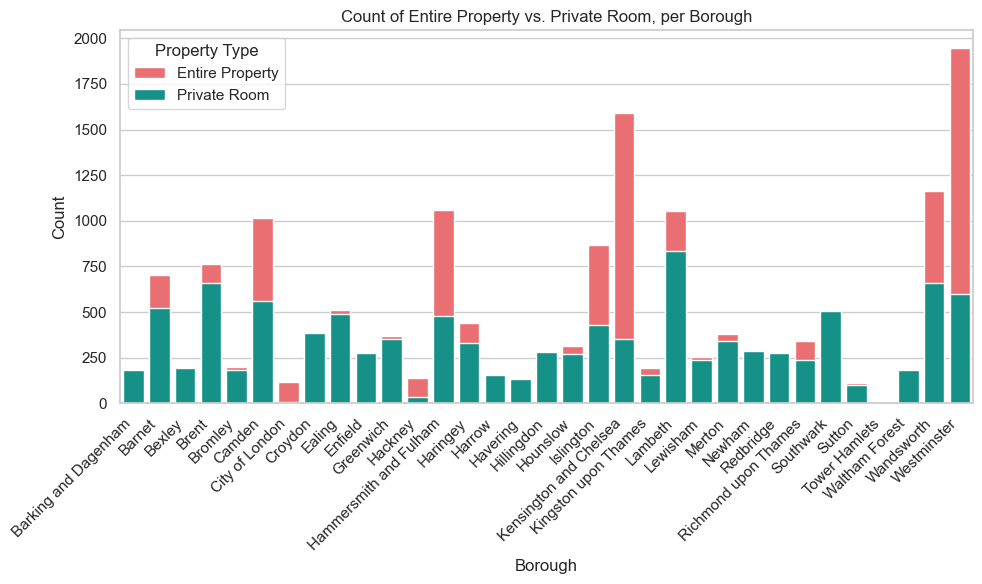

In [13]:
"""
Including this as an example of an interesting data visualisation problem that came up. Conclusions: visualisations 
are not a science and attention must be paid to whether they are actually communicating correct results. 
Hammersmith and Fulham appears higher on this stacked bar chart even though the total count for Camden is 1579 and 
the total count (height of the bar) for Hammersmith and Fulham is 1539.
"""

# Filter the relevant columns from the dataframe
propdis_df = abnb_propfil_df[['borough', 'room_type']]

# Group the data by borough and calculate the count of each property type
propgrouped_df = propdis_df.groupby(['borough', 'room_type']).size().unstack().reset_index()

# Set the background style
sns.set(style='whitegrid')

# Define custom colours
colours = ['#FF5A5F', '#00A699']  # Used Airbnb color palette

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='borough', y='Entire home/apt', data=propgrouped_df, color=colours[0], label='Entire Property')
sns.barplot(x='borough', y='Private room', data=propgrouped_df, color=colours[1], label='Private Room')

# Set the title and labels
plt.title('Count of Entire Property vs. Private Room, per Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Property Type')

# Tilt x-axis labels and increase spacing
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.15)

plt.tight_layout()


## Resolved the visualisation problem this way

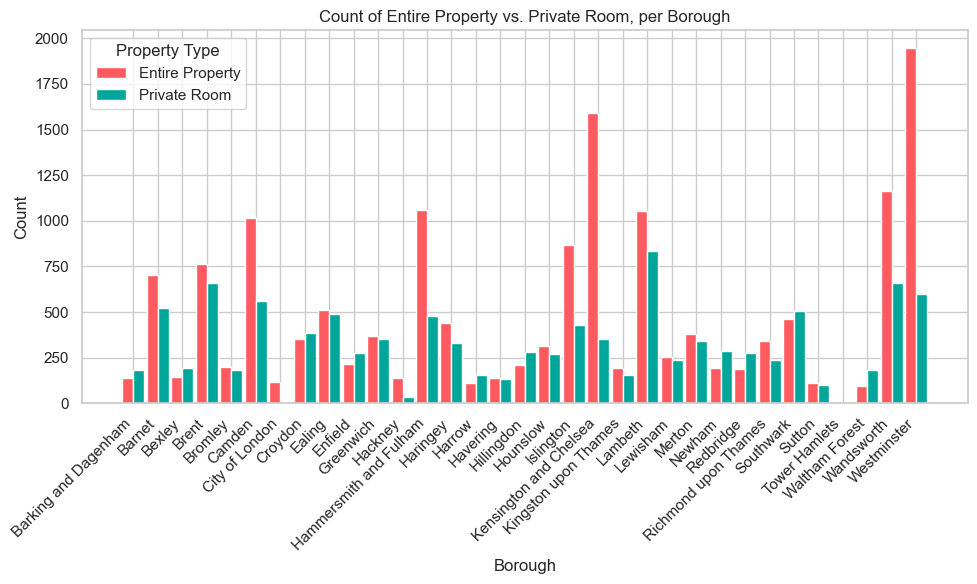

In [14]:
# Filter the relevant columns from the dataframe
propdis_df = abnb_propfil_df[['borough', 'room_type']]

# Group the data by borough and calculate the count of each property type
propgrouped_df = propdis_df.groupby(['borough', 'room_type']).size().unstack().reset_index()

# Set the background style
sns.set(style='whitegrid')

# Define custom colours
colors = ['#FF5A5F', '#00A699']  # Used Airbnb color palette

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the position of the bars for Entire Property and Private Room
bar_width = 0.45
position = propgrouped_df.index

# Plot the bars for Entire Property
ax.bar(position - bar_width/2, propgrouped_df['Entire home/apt'], width=bar_width, color=colors[0], label='Entire Property')

# Plot the bars for Private Room
ax.bar(position + bar_width/2, propgrouped_df['Private room'], width=bar_width, color=colors[1], label='Private Room')

# Set the x-axis ticks and labels
ax.set_xticks(position)
ax.set_xticklabels(propgrouped_df['borough'], rotation=45, ha='right')

# Set the title and labels
plt.title('Count of Entire Property vs. Private Room, per Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Property Type')

plt.tight_layout()

# Dividing into top 5 and bottom 5 boroughs for property count

In [15]:
# Filter the dataframe to include only the top 5 and bottom 5 boroughs
top_5_boroughs = abnb_propfil_df['borough'].value_counts().head(5).index.tolist()
bottom_5_boroughs = abnb_propfil_df['borough'].value_counts().tail(5).index.tolist()

top_5_df = abnb_propfil_df[abnb_propfil_df['borough'].isin(top_5_boroughs)]
bottom_5_df = abnb_propfil_df[abnb_propfil_df['borough'].isin(bottom_5_boroughs)]

# Calculate the count of Private room and Entire home/apt for the top 5 boroughs
top_5_counts = top_5_df['room_type'].value_counts()

# Calculate the count of Private room and Entire home/apt for the bottom 5 boroughs
bottom_5_counts = bottom_5_df['room_type'].value_counts()

**Checking in on variables**

In [16]:
top_5_boroughs

['Westminster', 'Kensington and Chelsea', 'Lambeth', 'Wandsworth', 'Camden']

In [17]:
bottom_5_boroughs

['Harrow', 'Sutton', 'Hackney', 'City of London', 'Tower Hamlets']

In [18]:
# Filters to 9769 rows
top_5_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
24,42823292,2023-03-14,173566547,2018-02-15,"England, United Kingdom",1.0,Wandsworth,51.421190,-0.162180,Private room in home,...,1 shared bath,1.0,1.0,$49.00,11,4.91,3,1125,t,1
29,31147353,2023-03-14,39043909,2015-07-20,"England, United Kingdom",10.0,Westminster,51.514260,-0.162879,Private room in rental unit,...,1 private bath,1.0,1.0,$49.00,1,5.00,20,300,t,1
30,52465075,2023-03-14,111526991,2017-01-15,"London, United Kingdom",3.0,Wandsworth,51.446670,-0.239790,Private room in casa particular,...,1.5 shared baths,NaN,1.0,$100.00,9,4.67,1,30,t,3
39,797686350021550506,2023-03-14,77545049,2016-06-13,"London, United Kingdom",1.0,Wandsworth,51.431517,-0.167582,Private room in home,...,1 shared bath,1.0,1.0,$100.00,2,5.00,1,365,t,1
47,813132941234001312,2023-03-14,493339,2011-04-08,"London, United Kingdom",1.0,Wandsworth,51.428830,-0.152524,Private room in home,...,1 private bath,1.0,1.0,$70.00,0,NaN,1,365,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75213,599814520961478296,2023-03-14,10961046,2014-01-02,"London, United Kingdom",303.0,Westminster,51.529813,-0.179899,Entire home,...,3.5 baths,4.0,4.0,$438.00,0,NaN,5,365,t,77
75229,23216468,2023-03-14,64995499,2016-03-30,NaN,47.0,Camden,51.540520,-0.175660,Entire rental unit,...,1 bath,NaN,1.0,$74.00,6,4.83,15,365,t,47
75232,53804372,2023-03-14,435827123,2021-12-13,"London, United Kingdom",3.0,Wandsworth,51.443590,-0.205300,Entire rental unit,...,1 bath,1.0,1.0,$80.00,16,4.94,1,365,t,3
75235,3191081,2023-03-14,16175110,2014-05-30,"London, United Kingdom",1.0,Lambeth,51.469360,-0.126080,Entire rental unit,...,1.5 baths,1.0,2.0,$116.00,19,4.84,3,30,t,1


In [19]:
# filters to 781 rows
bottom_5_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
2,822557738577472503,2023-03-14,325629338,2020-01-08,NaN,8.0,Harrow,51.608180,-0.277400,Entire rental unit,...,2 baths,2.0,2.0,$132.00,0,NaN,2,28,t,4
42,756548755816106645,2023-03-14,160339758,2017-11-27,"England, United Kingdom",2.0,Harrow,51.618050,-0.291880,Private room in home,...,1 private bath,1.0,1.0,$45.00,1,5.00,1,365,t,1
43,579727308697155906,2023-03-14,211131668,2018-08-22,"England, United Kingdom",1.0,Harrow,51.588040,-0.283800,Entire home,...,2.5 baths,3.0,3.0,$145.00,13,4.15,2,365,t,1
49,796976521904394170,2023-03-14,366340008,2020-09-07,"England, United Kingdom",3.0,Sutton,51.343672,-0.197052,Private room in home,...,3 shared baths,3.0,3.0,$85.00,0,NaN,2,365,f,1
50,30504747,2023-03-14,27254003,2015-02-05,"London, United Kingdom",1.0,Sutton,51.377720,-0.242040,Private room in rental unit,...,1 shared bath,1.0,1.0,$80.00,1,5.00,2,30,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75057,39044505,2023-03-14,34304689,2015-05-26,"Kingston upon Thames, United Kingdom",1.0,Sutton,51.373140,-0.243430,Private room in home,...,1 shared bath,1.0,1.0,$41.00,4,5.00,6,1125,t,1
75146,50920624,2023-03-14,83033358,2016-07-11,"London, United Kingdom",1.0,Sutton,51.359060,-0.149130,Entire loft,...,1 bath,1.0,1.0,$155.00,5,4.40,3,1125,t,1
75169,764555569532613674,2023-03-14,456524047,2022-04-28,"London, United Kingdom",1.0,Hackney,51.565268,-0.094489,Private room in rental unit,...,2 baths,1.0,1.0,$88.00,8,5.00,2,60,t,1
75206,665697865030270106,2023-03-14,249710996,2019-03-18,"England, United Kingdom",4.0,Harrow,51.575760,-0.371790,Entire condo,...,1 bath,1.0,1.0,$85.00,4,5.00,2,30,t,2


In [20]:
top_5_counts

room_type
Entire home/apt    6767
Private room       3002
Name: count, dtype: int64

In [21]:
bottom_5_counts

room_type
Entire home/apt    478
Private room       303
Name: count, dtype: int64

In [22]:
# Count the occurrences of each room type in whole set
room_type_counts = abnb_propfil_df['room_type'].value_counts()

room_type_counts

room_type
Entire home/apt    15779
Private room       10697
Name: count, dtype: int64

# Plotting pie charts for property type distribution for top 5 and bottom 5 boroughs by count

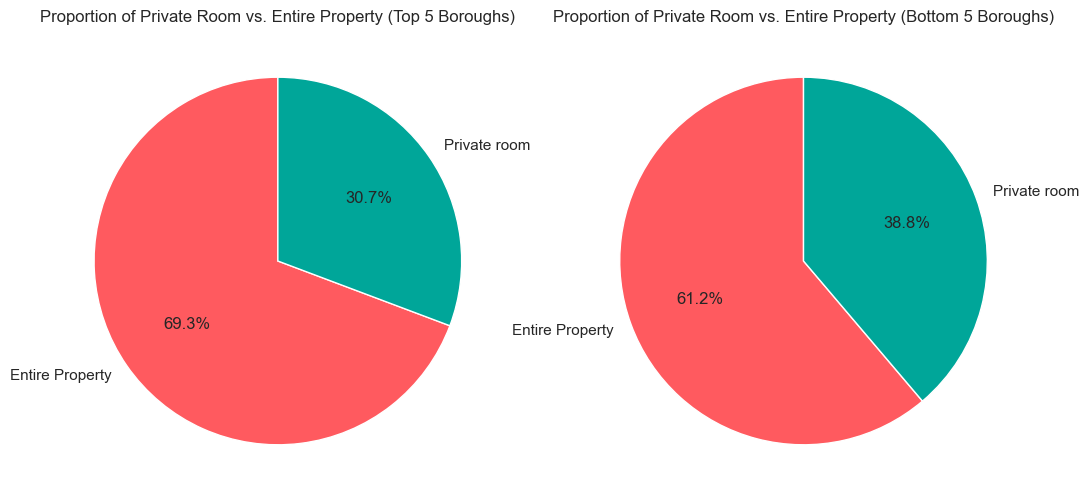

In [23]:
# Define custom colors to match Airbnb colour palette
colors = ['#FF5A5F', '#00A699']

# Create a plot with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for the top 5 boroughs
axes[0].pie(top_5_counts, labels=top_5_counts.index.map(lambda x: 'Entire Property' if x == 'Entire home/apt' else x),
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Proportion of Private Room vs. Entire Property (Top 5 Boroughs)')
axes[0].axis('equal')

# Plot the pie chart for the bottom 5 boroughs
axes[1].pie(bottom_5_counts, labels=bottom_5_counts.index.map(lambda x: 'Entire Property' if x == 'Entire home/apt' else x),
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proportion of Private Room vs. Entire Property (Bottom 5 Boroughs)')
axes[1].axis('equal')

# Adjust spacing between the subplots
plt.subplots_adjust(wspace=0.3)

# Working on the host_id variable

In [24]:
# matches number of rows
host_count = abnb_propfil_df['host_id'].count()
print(f"The total host count is: {host_count}")

The total host count is: 26476


In [25]:
unique_hosts = abnb_propfil_df['host_id'].nunique()
print(f"The number of unique hosts is: {unique_hosts}")

The number of unique hosts is: 15718


In [26]:
# adds up to total number of rows
total_hosts = abnb_propfil_df['host_id'].count()
unique_hosts = abnb_propfil_df['host_id'].nunique()
multiple_hosts = total_hosts - unique_hosts

print(f"The number of hosts with more than one property to let on Airbnb in this set is: {multiple_hosts}")

The number of hosts with more than one property to let on Airbnb in this set is: 10758


In [27]:
borough_unique_hosts = abnb_propfil_df.groupby('borough')['host_id'].nunique()
borough_non_unique_hosts = abnb_propfil_df['borough'].value_counts() - borough_unique_hosts

print("Number of properties with unique host IDs per borough:")
print(borough_unique_hosts)

print("Number of properties where host ID is not unique per borough:")
print(borough_non_unique_hosts)

Number of properties with unique host IDs per borough:
borough
Barking and Dagenham       228
Barnet                     717
Bexley                     234
Brent                      808
Bromley                    296
Camden                     981
City of London              62
Croydon                    497
Ealing                     591
Enfield                    331
Greenwich                  521
Hackney                    149
Hammersmith and Fulham     992
Haringey                   587
Harrow                     184
Havering                   180
Hillingdon                 275
Hounslow                   372
Islington                  925
Kensington and Chelsea    1048
Kingston upon Thames       251
Lambeth                   1396
Lewisham                   390
Merton                     533
Newham                     342
Redbridge                  310
Richmond upon Thames       451
Southwark                  653
Sutton                     152
Tower Hamlets                5
Waltham

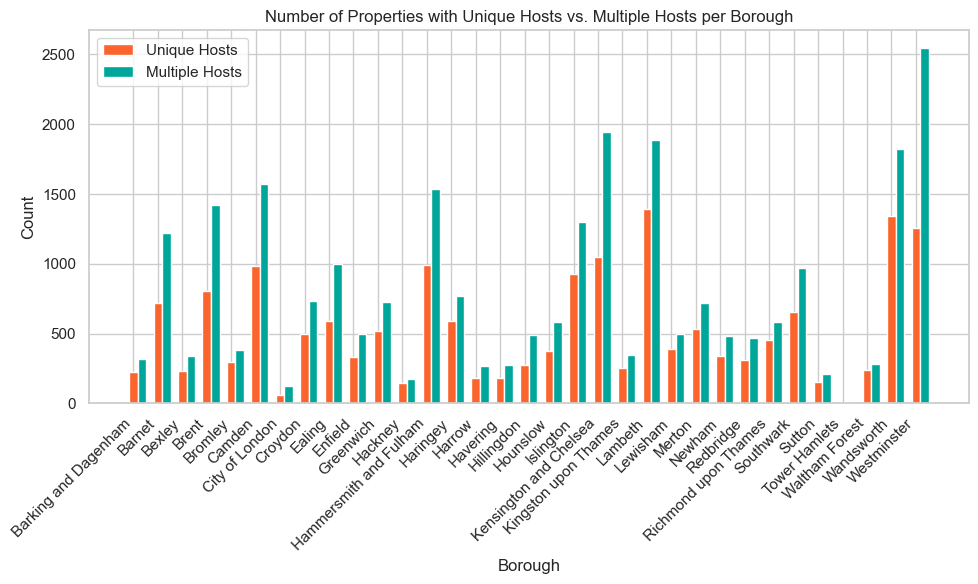

In [28]:
# The low count for Tower Hamlets does not register on the visualisation

# Group the data by borough and calculate the counts of unique and multiple hosts
host_counts = abnb_propfil_df.groupby('borough')['host_id'].agg(['nunique', 'count'])
host_counts = host_counts.rename(columns={'nunique': 'Unique Hosts', 'count': 'Multiple Hosts'})

# Set the background style
sns.set(style='whitegrid')

# Define custom colours - Airbnb set
colours = ['#FC642D', '#00A699']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar group
bar_width = 0.35

# Set the x-axis positions for the bars
x_pos = range(len(host_counts))

# Plot the bars for unique hosts
ax.bar(x_pos, host_counts['Unique Hosts'], width=bar_width, label='Unique Hosts', color=colours[0])

# Plot the bars for multiple hosts
ax.bar([x + bar_width for x in x_pos], host_counts['Multiple Hosts'], width=bar_width, label='Multiple Hosts', color=colors[1])

# Set the x-axis tick positions and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(host_counts.index, rotation=45, ha='right')

# Set the title and labels
plt.title('Number of Properties with Unique Hosts vs. Multiple Hosts per Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()

In [29]:
# These are the IDs and counts for the top 25 hosts (for most property) in the set
top_hosts = abnb_propfil_df.groupby('host_id').size().nlargest(25)
top_hosts_counts = top_hosts.reset_index(name='property_count')
top_hosts_counts

,host_id,property_count
0,129230780,205
1,1432477,110
2,258154594,101
3,48165024,90
4,33889201,84
5,314162972,77
6,469634122,72
7,269308503,66
8,2125620,62
9,224866971,60


In [30]:
# Here I'm double checking the most commonly occuring host in the set
host_id_counts = abnb_propfil_df['host_id'].value_counts()
most_common_host_id = host_id_counts.idxmax()
occurrences = host_id_counts.max()

print(f"The most commonly occurring host_id is: {most_common_host_id}")
print(f"The number of properties this host has listed in this set is: {occurrences}")

The most commonly occurring host_id is: 129230780
The number of properties this host has listed in this set is: 205


**Looking at the top hosts in more detail, investigating their operations of their businesses via other methods is indicated for further research as multiple hosts are clearly not part of the sharing economy, but this will remain outside the scope of this project**

# Working on the Price Variable. Converting to Float. Removing $ and , there are no NaN values 

In [31]:
abnb_propfil_df['price'] = abnb_propfil_df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
abnb_propfil_df['price'] = pd.to_numeric(abnb_propfil_df['price'], errors='coerce')

/var/folders/_f/z6lyw1dn0ls30vdshc39qd4h0000gn/T/ipykernel_31497/3081644428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb_propfil_df['price'] = abnb_propfil_df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
/var/folders/_f/z6lyw1dn0ls30vdshc39qd4h0000gn/T/ipykernel_31497/3081644428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb_propfil_df['price'] = pd.to_numeric(abnb_propfil_df['price'], errors='coerce')


In [32]:
# I had real trouble with this price column and I had to keep checking it. On reflection, it would have been 
# better to format it in cleaning, before any analysis, and definitely at the top of the notebook in lieu of this.
print(abnb_propfil_df['price'].dtype)

float64


In [33]:
# check variables
abnb_propfil_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
0,714569379355913481,2023-03-14,39009854,2015-07-20,"London, United Kingdom",1.0,Haringey,51.597280,-0.139330,Private room in condo,...,1 shared bath,1.0,1.0,100.0,0,NaN,1,365,t,1
1,808038970516277767,2023-03-14,495977998,2023-01-14,"London, United Kingdom",31.0,Barnet,51.636518,-0.177475,Entire rental unit,...,1 bath,1.0,1.0,65.0,0,NaN,180,365,t,7
2,822557738577472503,2023-03-14,325629338,2020-01-08,NaN,8.0,Harrow,51.608180,-0.277400,Entire rental unit,...,2 baths,2.0,2.0,132.0,0,NaN,2,28,t,4
3,3518856,2023-03-14,187811,2010-08-01,"London, United Kingdom",5.0,Merton,51.422310,-0.188410,Private room in rental unit,...,1 private bath,1.0,1.0,100.0,4,3.67,5,1125,t,2
4,4876550,2023-03-14,25087384,2014-12-22,NaN,1.0,Barnet,51.602282,-0.193606,Entire condo,...,1 bath,1.0,1.0,120.0,0,NaN,5,90,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75233,18762362,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.549400,-0.226210,Entire condo,...,1 bath,1.0,1.0,65.0,10,3.80,2,500,t,76
75235,3191081,2023-03-14,16175110,2014-05-30,"London, United Kingdom",1.0,Lambeth,51.469360,-0.126080,Entire rental unit,...,1.5 baths,1.0,2.0,116.0,19,4.84,3,30,t,1
75236,654949753111689538,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.551480,-0.223710,Entire rental unit,...,1 bath,NaN,1.0,69.0,23,4.52,2,365,t,76
75237,827653589245352551,2023-03-14,500054646,2023-02-07,NaN,1.0,Islington,51.543923,-0.088931,Entire rental unit,...,2 baths,1.0,1.0,140.0,2,5.00,1,365,t,1


# Visualising distribution of price for top 5 and bottom 5 boroughs for property count before adjusting for outliers

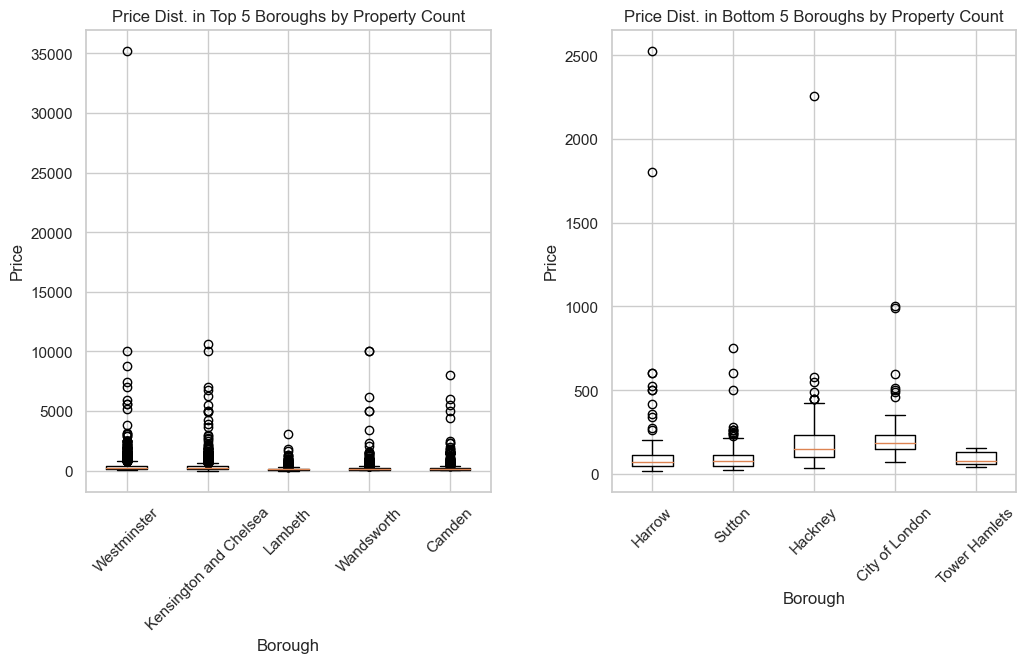

In [34]:
# Create a vis with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for the price variable in the top 5 boroughs
axes[0].boxplot([abnb_propfil_df[abnb_propfil_df['borough'] == borough]['price'] for borough in top_5_boroughs], labels=top_5_boroughs)
axes[0].set_title('Price Dist. in Top 5 Boroughs by Property Count')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Price')
axes[0].set_xticklabels(top_5_boroughs, rotation=45)

# Box plot for the price variable in the bottom 5 boroughs
axes[1].boxplot([abnb_propfil_df[abnb_propfil_df['borough'] == borough]['price'] for borough in bottom_5_boroughs], labels=bottom_5_boroughs)
axes[1].set_title('Price Dist. in Bottom 5 Boroughs by Property Count')
axes[1].set_xlabel('Borough')
axes[1].set_ylabel('Price')
axes[1].set_xticklabels(bottom_5_boroughs, rotation=45)

# Adjust spacing between the subplots
plt.subplots_adjust(wspace=0.3)

# Trying a statistical method called winsorisation, which is good  for removing very high and very low outliers. This method doesn't actually remove any rows from the df, it converts them.

N.B. I do not know how this works mathematically, but research led me to this method as a good approach for normalising very high and very low values. Interquartile range method had already been tried, it removed too many rows. 

In [35]:
# Winsorise the 'price' column to remove extreme values, using copy method to crete a new variable here
abnb_filtered_win_df = abnb_propfil_df.copy()

# Winsorise the 'price' column in the new DataFrame
abnb_filtered_win_df['price'] = winsorize(abnb_filtered_win_df['price'], limits=[0.01, 0.01])

abnb_filtered_win_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
0,714569379355913481,2023-03-14,39009854,2015-07-20,"London, United Kingdom",1.0,Haringey,51.597280,-0.139330,Private room in condo,...,1 shared bath,1.0,1.0,100.0,0,NaN,1,365,t,1
1,808038970516277767,2023-03-14,495977998,2023-01-14,"London, United Kingdom",31.0,Barnet,51.636518,-0.177475,Entire rental unit,...,1 bath,1.0,1.0,65.0,0,NaN,180,365,t,7
2,822557738577472503,2023-03-14,325629338,2020-01-08,NaN,8.0,Harrow,51.608180,-0.277400,Entire rental unit,...,2 baths,2.0,2.0,132.0,0,NaN,2,28,t,4
3,3518856,2023-03-14,187811,2010-08-01,"London, United Kingdom",5.0,Merton,51.422310,-0.188410,Private room in rental unit,...,1 private bath,1.0,1.0,100.0,4,3.67,5,1125,t,2
4,4876550,2023-03-14,25087384,2014-12-22,NaN,1.0,Barnet,51.602282,-0.193606,Entire condo,...,1 bath,1.0,1.0,120.0,0,NaN,5,90,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75233,18762362,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.549400,-0.226210,Entire condo,...,1 bath,1.0,1.0,65.0,10,3.80,2,500,t,76
75235,3191081,2023-03-14,16175110,2014-05-30,"London, United Kingdom",1.0,Lambeth,51.469360,-0.126080,Entire rental unit,...,1.5 baths,1.0,2.0,116.0,19,4.84,3,30,t,1
75236,654949753111689538,2023-03-14,57989340,2016-02-09,NaN,110.0,Brent,51.551480,-0.223710,Entire rental unit,...,1 bath,NaN,1.0,69.0,23,4.52,2,365,t,76
75237,827653589245352551,2023-03-14,500054646,2023-02-07,NaN,1.0,Islington,51.543923,-0.088931,Entire rental unit,...,2 baths,1.0,1.0,140.0,2,5.00,1,365,t,1


# Running boxplots again post-winsorisation 

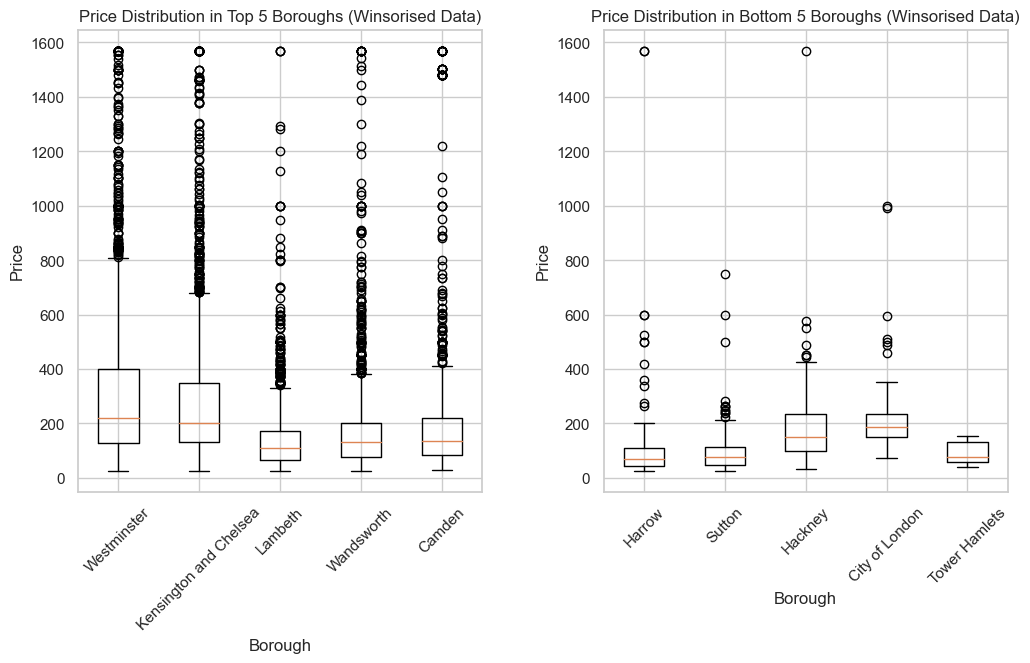

In [36]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for the price variable in the top 5 boroughs (winsorised data)
axes[0].boxplot([abnb_filtered_win_df[abnb_filtered_win_df['borough'] == borough]['price'] for borough in top_5_boroughs], labels=top_5_boroughs)
axes[0].set_title('Price Distribution in Top 5 Boroughs (Winsorised Data)')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Price')
axes[0].set_xticklabels(top_5_boroughs, rotation=45)

# Box plot for the price variable in the bottom 5 boroughs (winsorised data)
axes[1].boxplot([abnb_filtered_win_df[abnb_filtered_win_df['borough'] == borough]['price'] for borough in bottom_5_boroughs], labels=bottom_5_boroughs)
axes[1].set_title('Price Distribution in Bottom 5 Boroughs (Winsorised Data)')
axes[1].set_xlabel('Borough')
axes[1].set_ylabel('Price')
axes[1].set_xticklabels(bottom_5_boroughs, rotation=45)

# Adjust spacing between the subplots
plt.subplots_adjust(wspace=0.3)

In [37]:
# Calculate the average price per borough
average_prices_borough = abnb_filtered_win_df.groupby('borough')['price'].mean().reset_index()
average_prices_borough = average_prices_borough.rename(columns={'price': 'Average Price'})

# Sort the boroughs by average price in descending order
sorted_boroughs = average_prices_borough.sort_values('Average Price', ascending=False)

# Get the top 5 and bottom 5 boroughs by average price
top_5_boroughs = sorted_boroughs.head(5)['borough'].tolist()
bottom_5_boroughs = sorted_boroughs.tail(5)['borough'].tolist()

# Filter the data for the top 5 and bottom 5 boroughs
top_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(top_5_boroughs)]
bottom_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(bottom_5_boroughs)]

# Calculate the average price per property type (entire property and private room) for the top 5 boroughs
mean_prices_top = top_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Calculate the average price per property type (entire property and private room) for the bottom 5 boroughs
mean_prices_bottom = bottom_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Map the room type labels
property_labels = {'Private room': 'Private Room', 'Entire home/apt': 'Entire Property'}
mean_prices_top['room_type'] = mean_prices_top['room_type'].map(property_labels)
mean_prices_bottom['room_type'] = mean_prices_bottom['room_type'].map(property_labels)

# Sort the average prices per borough overall in descending order
average_prices_borough = average_prices_borough.sort_values('Average Price', ascending=False)

# Sort the average prices per property type for the top 5 boroughs in descending order
mean_prices_top = mean_prices_top.sort_values('price', ascending=False)

# Sort the average prices per property type for the bottom 5 boroughs in descending order
mean_prices_bottom = mean_prices_bottom.sort_values('price', ascending=False)

# Print the sorted average prices per borough overall
print("Average Prices per Borough Overall (sorted by descending order):")
print(average_prices_borough)

# Print the sorted average prices per property type for the top 5 boroughs
print("\nAverage Prices per Property Type in Top 5 Boroughs (sorted by descending order):")
print(mean_prices_top)

# Print the sorted average prices per property type for the bottom 5 boroughs
print("\nAverage Prices per Property Type in Bottom 5 Boroughs (sorted by descending order):")
print(mean_prices_bottom)

Average Prices per Borough Overall (sorted by descending order):
                   borough  Average Price
32             Westminster     331.104126
19  Kensington and Chelsea     308.331788
27               Southwark     240.955579
3                    Brent     226.591005
6           City of London     211.549180
5                   Camden     211.155118
17                Hounslow     197.077320
12  Hammersmith and Fulham     188.979778
11                 Hackney     184.109195
18               Islington     182.441789
31              Wandsworth     180.382967
26    Richmond upon Thames     178.693632
13                Haringey     172.238961
23                  Merton     159.504155
1                   Barnet     156.879607
21                 Lambeth     144.697354
8                   Ealing     130.036108
20    Kingston upon Thames     128.836676
15                Havering     126.112727
24                  Newham     125.734990
4                  Bromley     121.619423
9          

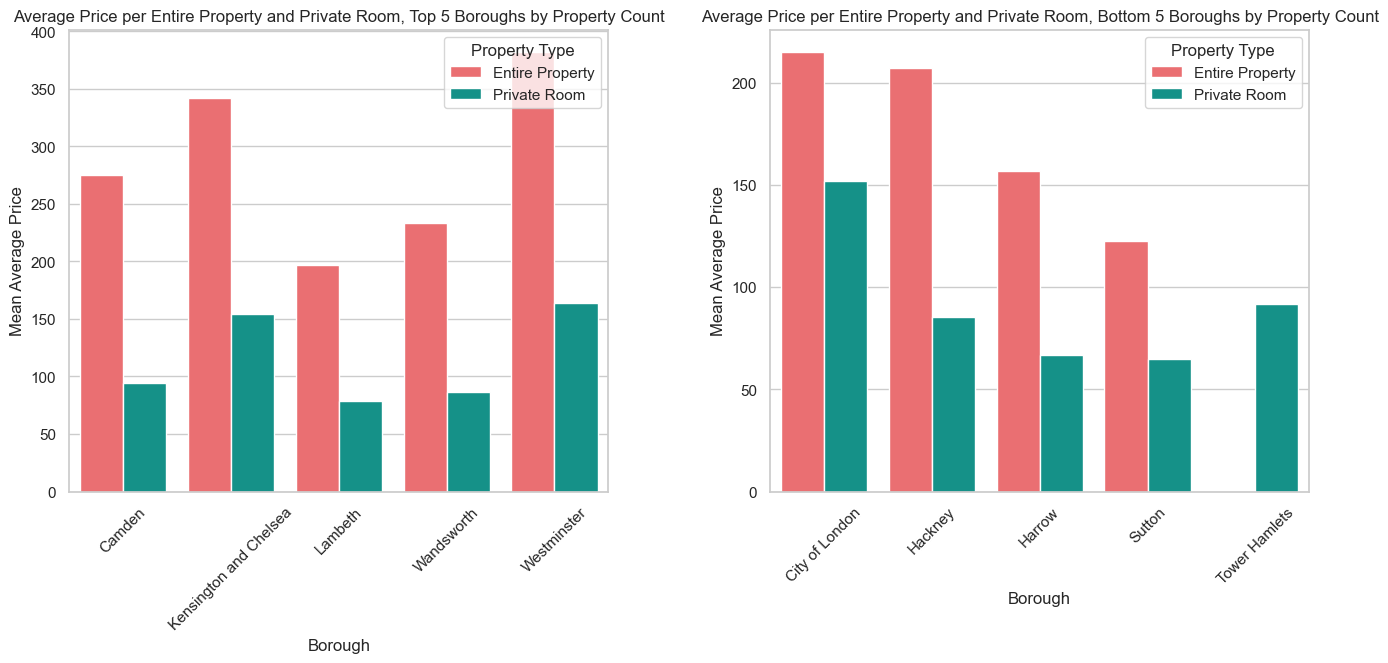

In [38]:
# Define the colours for each property type
colours = ['#FF5A5F', '#00A699']

# Calculate the property count for each borough
borough_counts = abnb_filtered_win_df['borough'].value_counts()

# Get the top 5 and bottom 5 boroughs by property count
top_5_boroughs = borough_counts.head(5).index.tolist()
bottom_5_boroughs = borough_counts.tail(5).index.tolist()

# Filter the data for the top 5 and bottom 5 boroughs
top_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(top_5_boroughs)]
bottom_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(bottom_5_boroughs)]

# Calculate the mean average price for Entire Property and Private Room in the top 5 boroughs
mean_prices_top = top_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Map the room type labels for the legend
property_labels = {'Private room': 'Private Room', 'Entire home/apt': 'Entire Property'}
mean_prices_top['room_type'] = mean_prices_top['room_type'].map(property_labels)

# Calculate the mean average price for Entire Property and Private Room in the bottom 5 boroughs
mean_prices_bottom = bottom_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Map the room type labels for the legend
mean_prices_bottom['room_type'] = mean_prices_bottom['room_type'].map(property_labels)

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the mean average price for Entire Property and Private Room in the top 5 boroughs
sns.barplot(data=mean_prices_top, x='borough', y='price', hue='room_type', palette=colours, ax=ax1)
ax1.set_title('Average Price per Entire Property and Private Room, Top 5 Boroughs by Property Count')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Mean Average Price')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(title='Property Type', loc='upper right')

# Plot the mean average price for Entire Property and Private Room in the bottom 5 boroughs
sns.barplot(data=mean_prices_bottom, x='borough', y='price', hue='room_type', palette=colours, ax=ax2)
ax2.set_title('Average Price per Entire Property and Private Room, Bottom 5 Boroughs by Property Count')
ax2.set_xlabel('Borough')
ax2.set_ylabel('Mean Average Price')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend(title='Property Type', loc='upper right')

# Adjust the spacing 
plt.subplots_adjust(wspace=0.3)

# Finding the number of properties by price (winsorised data)
After investigation, the prices appear to be round numbers listed as $USD, this suggests that they haven't been converted to USD from GBP. The assumption is therefore that these prices are in £GBP, this assumption is noted for further investigation in future

**Adding a price categories column and taking a look at it**

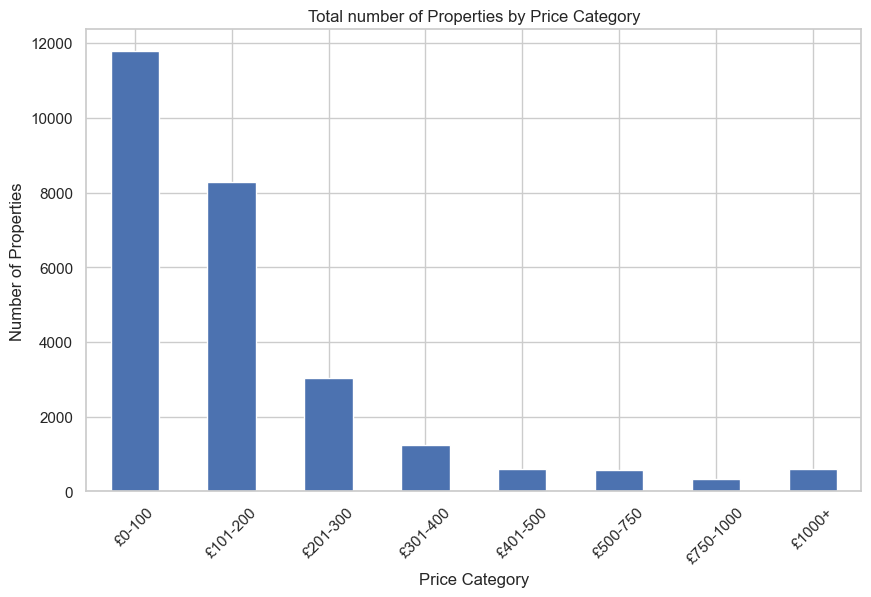

In [39]:
# Define the price bins for the categories
price_intervals = [0, 100, 200, 300, 400, 500, 750, 1000, np.inf]

# Define the labels for the categories
category_labels = ['£0-100', '£101-200', '£201-300', '£301-400', '£401-500', '£500-750', '£750-1000', '£1000+']

# Create a new price category column with the numerical categories
abnb_filtered_win_df['price_category'] = pd.cut(abnb_filtered_win_df['price'], bins=price_intervals, labels=category_labels)

# Calculate the count of properties in each category
category_counts = abnb_filtered_win_df['price_category'].value_counts().sort_index()

# Plot the count of properties in each category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Total number of Properties by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.savefig('PriCat.pdf', dpi=300, bbox_inches='tight')

# Plotting the price variable against number of reviews and trying some statistical methods to deal with review count outliers

# 1. With number of reviews outliers included

Text(0, 0.5, 'Number of Reviews')

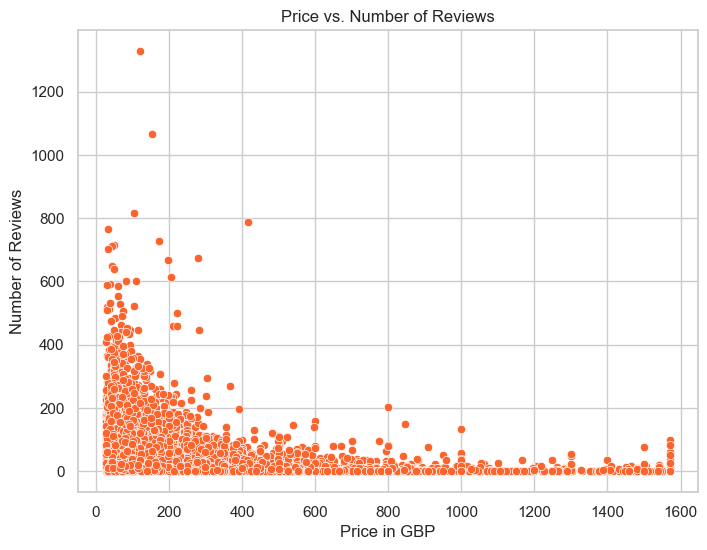

In [40]:
# Extract the price and number of reviews columns
price = abnb_filtered_win_df['price']
num_reviews = abnb_filtered_win_df['number_of_reviews']

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=price, y=num_reviews, color='#FC642D')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price in GBP')
plt.ylabel('Number of Reviews')

# 2. With outliers removed by interquartile range method

Text(0, 0.5, 'Number of Reviews')

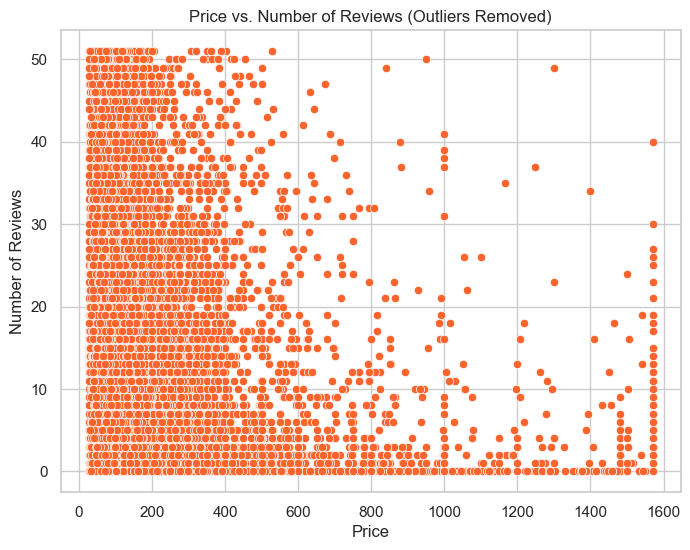

In [41]:
# Extract the price and number of reviews columns
price = abnb_filtered_win_df['price']
num_reviews = abnb_filtered_win_df['number_of_reviews']

# Calculate the IQR
Q1 = np.percentile(num_reviews, 25)
Q3 = np.percentile(num_reviews, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_df = abnb_filtered_win_df[(num_reviews >= lower_bound) & (num_reviews <= upper_bound)]
filtered_price = filtered_df['price']
filtered_num_reviews = filtered_df['number_of_reviews']

# Create the scatter plot with airbnb colour palette
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_price, y=filtered_num_reviews, color='#FC642D')
plt.title('Price vs. Number of Reviews (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')


# 3. With outliers removed by z-scores method

Text(0, 0.5, 'Number of Reviews')

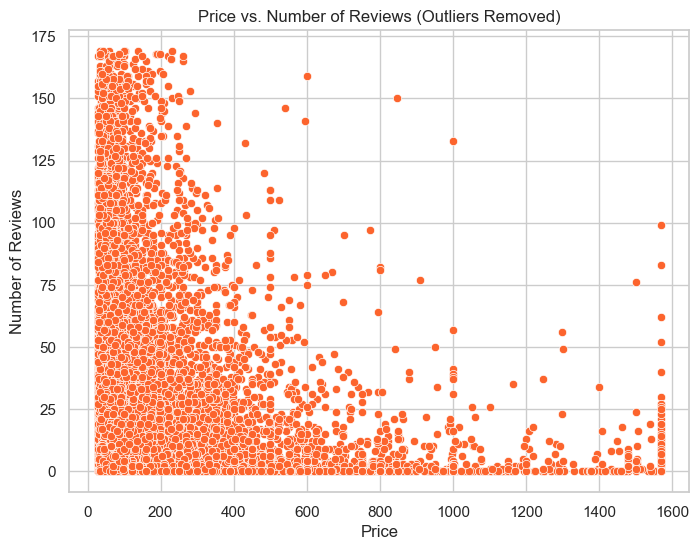

In [42]:
# Extract the price and number of reviews columns
price = abnb_filtered_win_df['price']
num_reviews = abnb_filtered_win_df['number_of_reviews']

# Calculate the z-scores
z_scores = np.abs(stats.zscore(num_reviews))

# Define the threshold for outlier detection
threshold = 3

# Filter the data to remove outliers
filtered_df = abnb_filtered_win_df[z_scores < threshold]
filtered_price = filtered_df['price']
filtered_num_reviews = filtered_df['number_of_reviews']

# Create the scatter plot with airbnb colour palette
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_price, y=filtered_num_reviews, color='#FC642D')
plt.title('Price vs. Number of Reviews (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

# Plotting a bar graph for mean avg. price of room in top 5 and bottom 5 boroughs by count

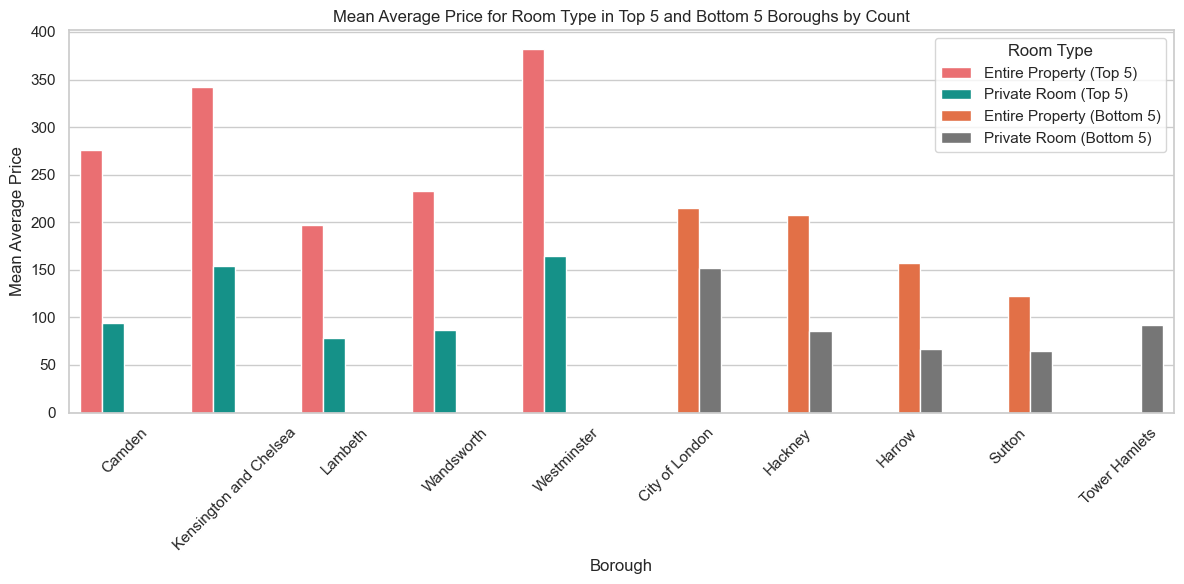

In [43]:
# Define the colours for each property type
top_colors = ['#FF5A5F', '#00A699']
bottom_colors = ['#FC642D', '#767676']

# Calculate the mean average price for room type
mean_prices_top = top_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Map the room type labels for the legend
property_labels_top = {'Private room': 'Private Room (Top 5)', 'Entire home/apt': 'Entire Property (Top 5)'}
mean_prices_top['room_type'] = mean_prices_top['room_type'].map(property_labels_top)

# Calculate the mean average price for room type
mean_prices_bottom = bottom_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Map the room type labels for the legend
property_labels_bottom = {'Private room': 'Private Room (Bottom 5)', 'Entire home/apt': 'Entire Property (Bottom 5)'}
mean_prices_bottom['room_type'] = mean_prices_bottom['room_type'].map(property_labels_bottom)

# Combine the top and bottom dataframes
combined_df = pd.concat([mean_prices_top, mean_prices_bottom], ignore_index=True)

# Plot the mean average price for 'room_type' for the top 5 and bottom 5 boroughs
plt.figure(figsize=(12, 6))

sns.barplot(data=combined_df, x='borough', y='price', hue='room_type',
            palette=top_colors + bottom_colors)

plt.title('Mean Average Price for Room Type in Top 5 and Bottom 5 Boroughs by Count')
plt.xlabel('Borough')
plt.ylabel('Mean Average Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type', loc='upper right')

plt.tight_layout()

# Plotting a box plot to show property price distribution across boroughs

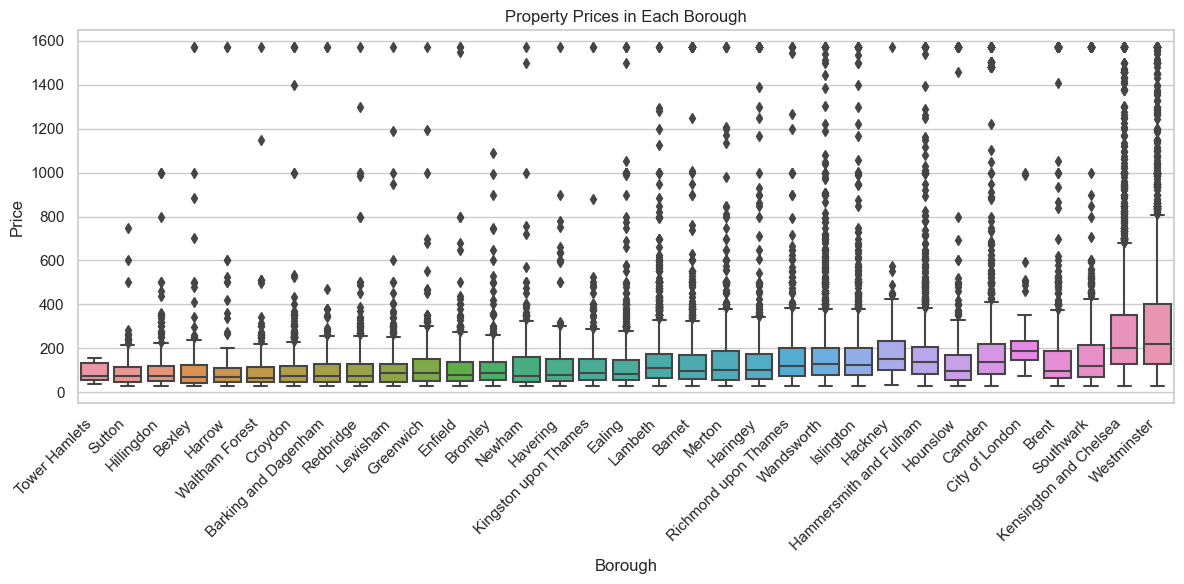

In [44]:
# Calculate the mean average price for each borough
mean_prices = abnb_filtered_win_df.groupby('borough')['price'].mean().reset_index()
mean_prices_sorted = mean_prices.sort_values(by='price')

# Get the list of boroughs
boroughs = mean_prices_sorted['borough'].tolist()

# Create a box plot for property prices in each borough
plt.figure(figsize=(12, 6))
sns.boxplot(data=abnb_filtered_win_df, x='borough', y='price', order=boroughs)
plt.title('Property Prices in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Plotting box plots to show price distribution in top 5 and bottom 5 boroughs for price and for count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'City of London'),
  Text(1, 0, 'Brent'),
  Text(2, 0, 'Southwark'),
  Text(3, 0, 'Kensington and Chelsea'),
  Text(4, 0, 'Westminster'),
  Text(5, 0, 'Tower Hamlets'),
  Text(6, 0, 'Sutton'),
  Text(7, 0, 'Hillingdon'),
  Text(8, 0, 'Bexley'),
  Text(9, 0, 'Harrow')])

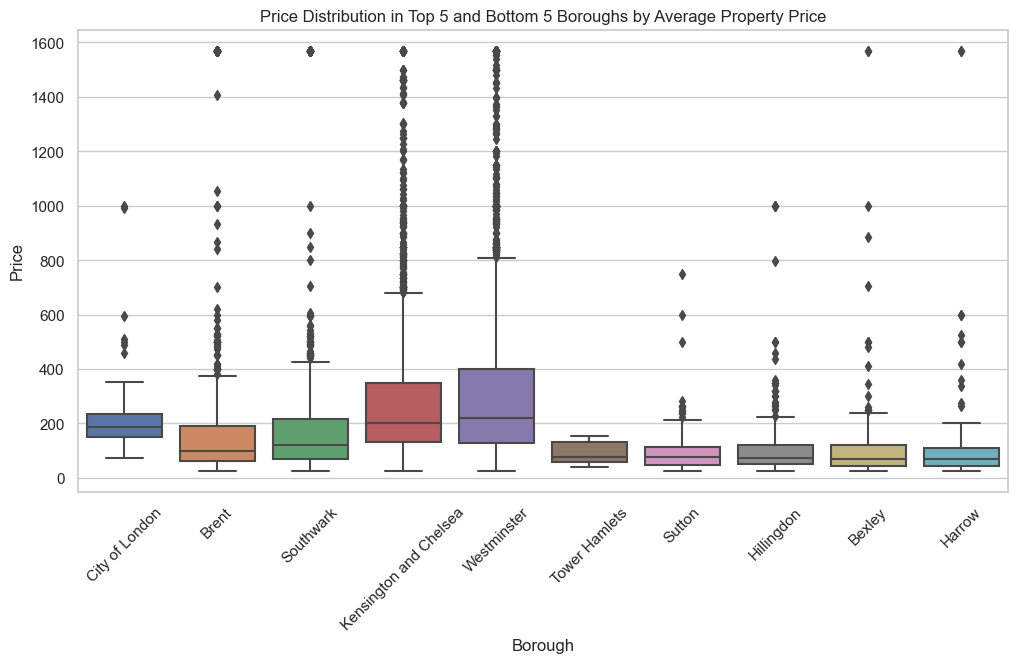

In [45]:
# Calculate the mean average price for each borough
mean_prices = abnb_filtered_win_df.groupby('borough')['price'].mean().reset_index()
mean_prices_sorted = mean_prices.sort_values(by='price')

# Get the top 5 and bottom 5 boroughs based on property price
top_5_boroughs = mean_prices_sorted.tail(5)['borough'].tolist()
bottom_5_boroughs = mean_prices_sorted.head(5)['borough'].tolist()

# Filter the data for the top 5 and bottom 5 boroughs
top_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(top_5_boroughs)]
bottom_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(bottom_5_boroughs)]

# Combine the top and bottom dataframes
combined_df = pd.concat([top_5_df, bottom_5_df])

# Plot the property prices for the top 5 and bottom 5 boroughs
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='borough', y='price', order=top_5_boroughs + bottom_5_boroughs)
plt.title('Price Distribution in Top 5 and Bottom 5 Boroughs by Average Property Price')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45)

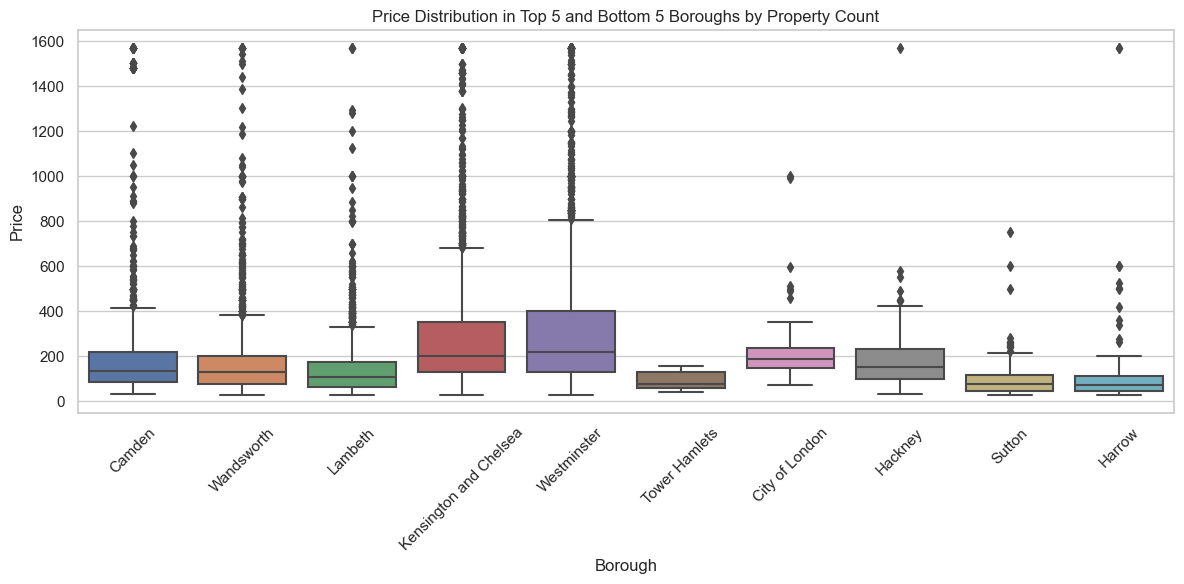

In [46]:
# Calculate the property count for each borough
property_counts = abnb_filtered_win_df['borough'].value_counts().reset_index()
property_counts.columns = ['borough', 'count']
property_counts_sorted = property_counts.sort_values(by='count')

# Get the top 5 and bottom 5 boroughs based on property count
top_5_boroughs = property_counts_sorted.tail(5)['borough'].tolist()
bottom_5_boroughs = property_counts_sorted.head(5)['borough'].tolist()

# Filter the data for the top 5 and bottom 5 boroughs
top_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(top_5_boroughs)]
bottom_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(bottom_5_boroughs)]

# Combine the top and bottom dataframes
combined_df = pd.concat([top_5_df, bottom_5_df])

# Plot the price distribution for the top 5 and bottom 5 boroughs
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='borough', y='price', order=top_5_boroughs + bottom_5_boroughs)
plt.title('Price Distribution in Top 5 and Bottom 5 Boroughs by Property Count')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting a heatmap to visualise distribution between price categories by borough

Text(92.24999999999999, 0.5, 'Borough')

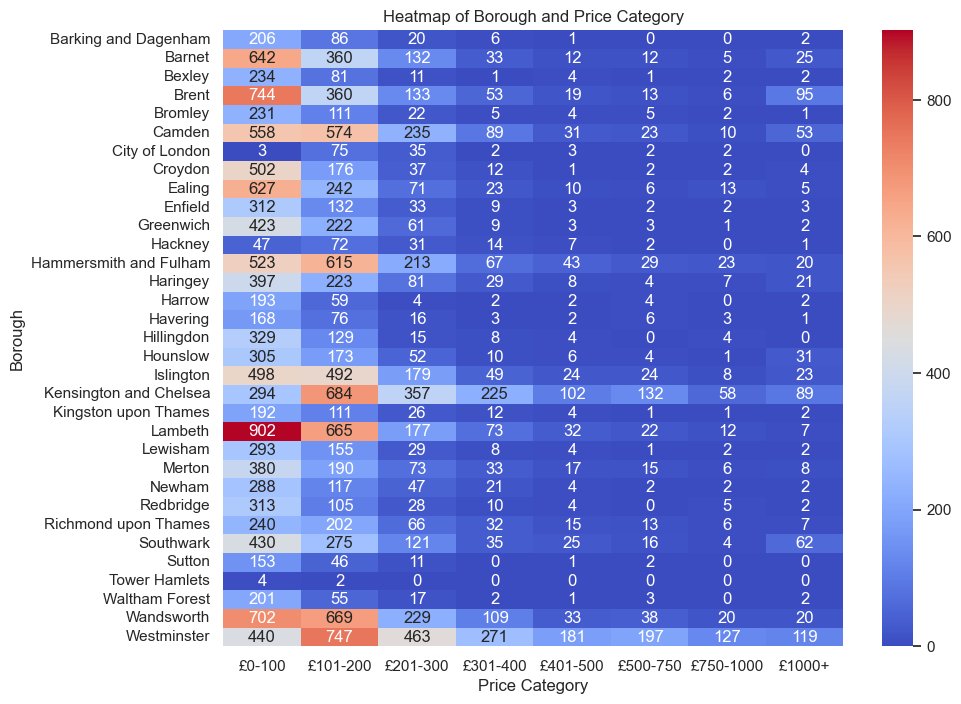

In [47]:
# Select the relevant columns from the DF
heatmap_data = abnb_filtered_win_df[['borough', 'price_category']]

# Pivot the data to create a cross-tabulation table
pivot_table = heatmap_data.pivot_table(index='borough', columns='price_category', aggfunc=len, fill_value=0)

# Create the heat map 
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')

# Set the plot title and axis labels
plt.title('Heatmap of Borough and Price Category')
plt.xlabel('Price Category')
plt.ylabel('Borough')

In [48]:
# Group the DF by borough and calculate the mean price for each borough
borough_prices = abnb_filtered_win_df.groupby('borough')['price'].mean()

# Sort the borough prices series in ascending order
sorted_boroughs = borough_prices.sort_values()

# Get the top 5 boroughs with the highest average price
top_5_boroughs_high = sorted_boroughs.tail(5)

# Get the bottom 5 boroughs with the lowest average price
bottom_5_boroughs_low = sorted_boroughs.head(5)

print("Top 5 boroughs with highest average price:")
print(top_5_boroughs_high)

print("\nBottom 5 boroughs with lowest average price:")
print(bottom_5_boroughs_low)

Top 5 boroughs with highest average price:
borough
City of London            211.549180
Brent                     226.591005
Southwark                 240.955579
Kensington and Chelsea    308.331788
Westminster               331.104126
Name: price, dtype: float64

Bottom 5 boroughs with lowest average price:
borough
Tower Hamlets     91.500000
Sutton            94.995305
Hillingdon       101.775051
Bexley           104.032738
Harrow           104.390977
Name: price, dtype: float64


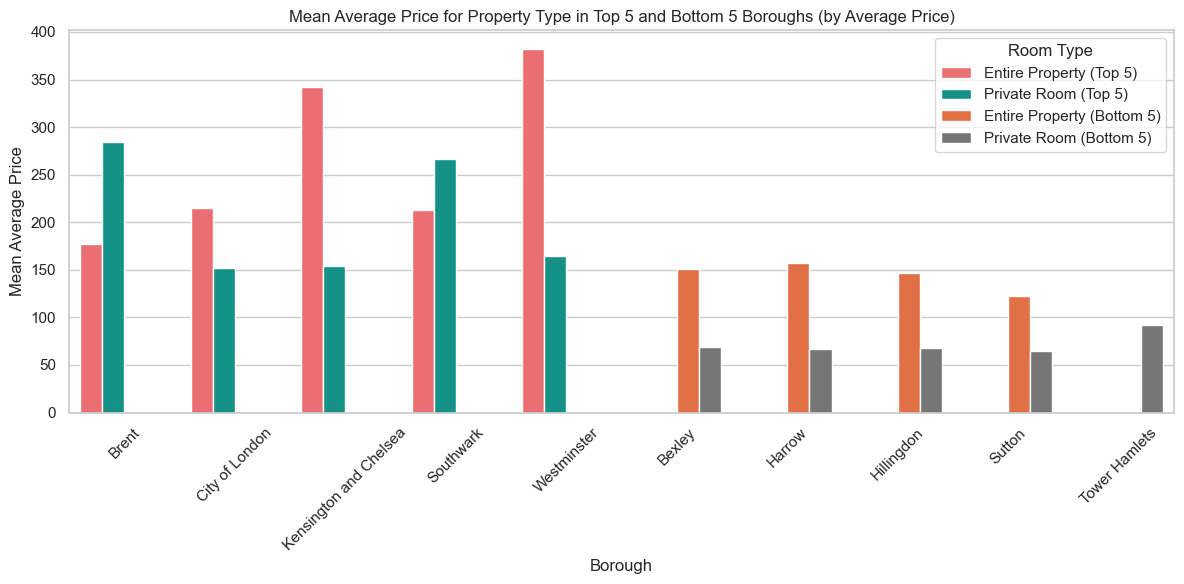

In [49]:
# Define the colours for each property type
top_colors = ['#FF5A5F', '#00A699']
bottom_colors = ['#FC642D', '#767676']

# Calculate the mean average price for each borough
mean_prices_by_borough = abnb_filtered_win_df.groupby('borough')['price'].mean().reset_index()

# Sort the boroughs based on average price
sorted_boroughs = mean_prices_by_borough.sort_values('price')

# Select the top 5 and bottom 5 boroughs based on average price
top_5_boroughs = sorted_boroughs.tail(5)['borough'].tolist()
bottom_5_boroughs = sorted_boroughs.head(5)['borough'].tolist()

# Filter the data for the top 5 and bottom 5 boroughs
top_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(top_5_boroughs)]
bottom_5_df = abnb_filtered_win_df[abnb_filtered_win_df['borough'].isin(bottom_5_boroughs)]

# Calculate the mean average price for room type in the top 5 boroughs
mean_prices_top = top_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Map the room type labels for legend
property_labels_top = {'Private room': 'Private Room (Top 5)', 'Entire home/apt': 'Entire Property (Top 5)'}
mean_prices_top['room_type'] = mean_prices_top['room_type'].map(property_labels_top)

# Calculate the mean average price for room type in the bottom 5 boroughs
mean_prices_bottom = bottom_5_df.groupby(['borough', 'room_type'])['price'].mean().reset_index()

# Map the room type labels for legend
property_labels_bottom = {'Private room': 'Private Room (Bottom 5)', 'Entire home/apt': 'Entire Property (Bottom 5)'}
mean_prices_bottom['room_type'] = mean_prices_bottom['room_type'].map(property_labels_bottom)

# Combine the top and bottom dataframes
combined_df = pd.concat([mean_prices_top, mean_prices_bottom], ignore_index=True)

# Plot the mean average price for 'room_type' for the top 5 and bottom 5 boroughs
plt.figure(figsize=(12, 6))

sns.barplot(data=combined_df, x='borough', y='price', hue='room_type',
            palette=top_colors + bottom_colors)

plt.title('Mean Average Price for Property Type in Top 5 and Bottom 5 Boroughs (by Average Price)')
plt.xlabel('Borough')
plt.ylabel('Mean Average Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type', loc='upper right')

plt.tight_layout()
# plt.savefig('PriBor9.pdf', dpi=300, bbox_inches='tight')